<a href="https://colab.research.google.com/github/Thierry0liveira/Faculdade/blob/main/Tratamento_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO E PREVISÃO DE DOENÇA CARDÍACA



---



Este projeto tem por objetivo desenvolver um algortmo de Machine Leraning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoirais de referência.

Os dados foram extraídos do site Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In [1]:
import numpy as np
import pandas as pd


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Machine Learning/heart.csv', sep=',', encoding='iso-8859-1')
#encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1

**Exploração dos Dados**

In [ ]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


exibir quantidade de linhas e registros(variáveis)

In [ ]:
dados.shape

(918, 12)

**Análise das Variáveis(atributos)**

**Age = idade**

In [ ]:
dados['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
62,35
59,35
51,35


In [ ]:
dados.Age.value_counts()


,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
62,35
59,35
51,35


In [ ]:
dados['Age'].value_counts().sort_index()

,count
Age,
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


**Bibliotecas de gráficos**

In [ ]:
import plotly.express as px

**Histograma**

In [ ]:
hist1 = px.histogram(dados, x='Age', nbins=100)
hist1.update_layout(width=800, height=500, title='Distribuição das Idades')
hist1.show()

In [ ]:
import seaborn as sns

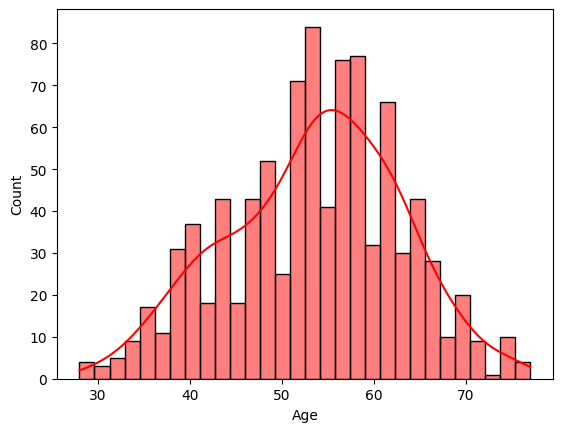

In [ ]:
sns.histplot(dados, x='Age', bins=30, color='red', kde=True, stat='count');

**Sex = sexo **

In [ ]:
dados['Sex'].value_counts()

,count
Sex,
M,725
F,193


**Gráfico de quantidade de pessoas por sexo**

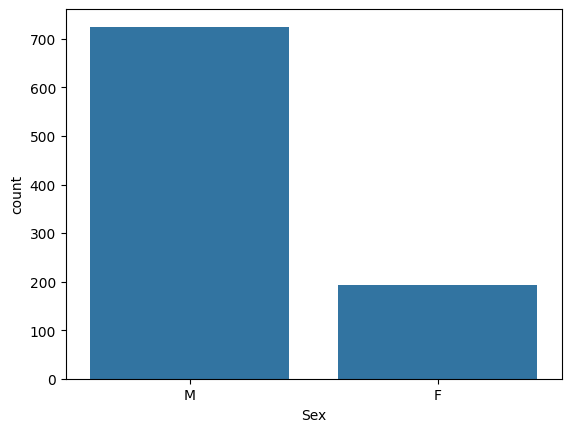

In [ ]:
sns.countplot(x='Sex', data=dados);

**ChestPainType = Tipo de dor no peito**

In [ ]:
dados['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


ASY: assintomático.

NAP: dor não anginosa.

ATA: angina atípica.

TA: angina típica.

**Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

In [ ]:
dados.RestingBP.value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


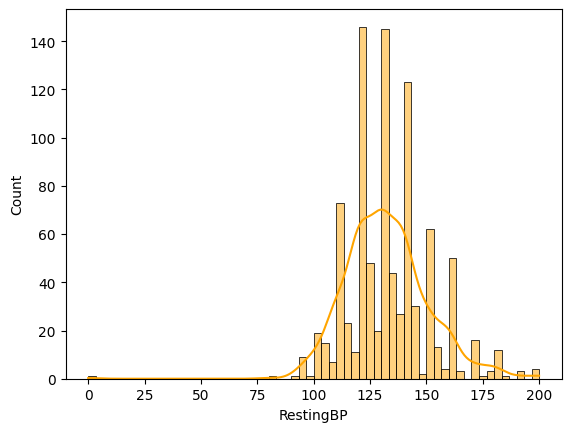

In [ ]:
sns.histplot(dados, x='RestingBP', bins=60, color='orange', kde=True, stat='count');

**Cholesterol = colesterol sérico (mg/dl)**

In [ ]:
dados.Cholesterol.value_counts().sort_index()

,count
Cholesterol,
0,172
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


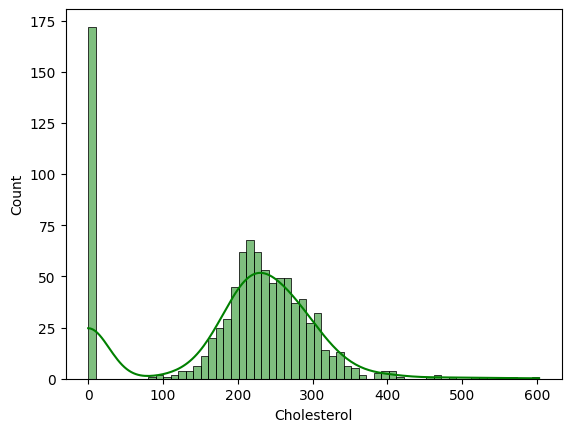

In [ ]:
sns.histplot(dados, x='Cholesterol', bins=60, color='green', kde=True, stat='count');

**Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [ ]:
dados.FastingBS.value_counts()

,count
FastingBS,
0,704
1,214


0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

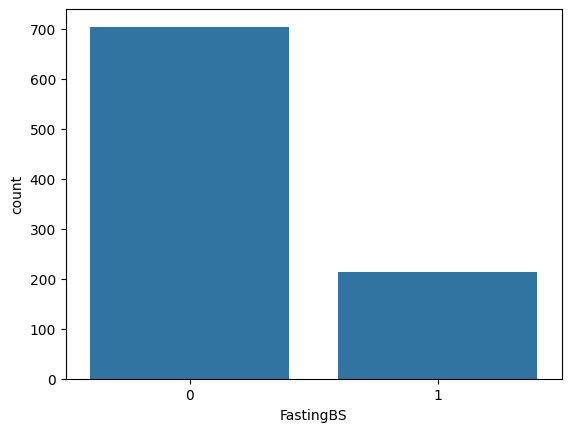

In [ ]:
sns.countplot(x='FastingBS', data=dados);

**Resting ECG = eletrocardiograma em repouso**

In [ ]:
dados.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

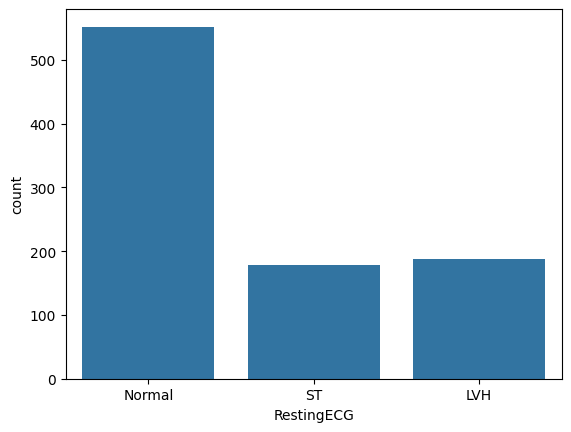

In [ ]:
sns.countplot(x='RestingECG', data=dados);

In [ ]:
dados.MaxHR.value_counts()
#dados['MaxHR'].value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
192,1
195,1
194,1


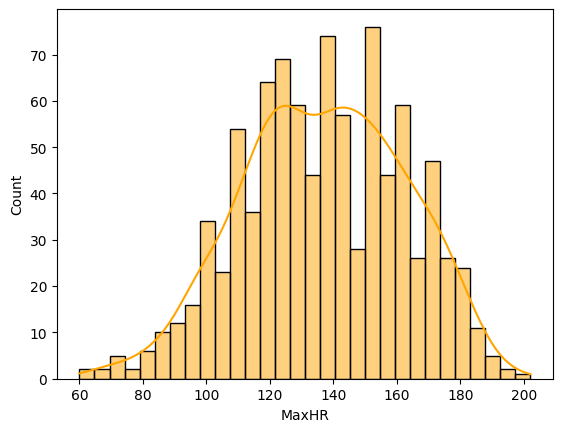

In [ ]:
sns.histplot(dados, x='MaxHR', bins=30, color='orange', kde=True, stat='count');

**Exercise Angina = Angina Induzida por exercício **

In [ ]:
dados.ExerciseAngina.value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
px.pie(dados, 'ExerciseAngina')

**Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

In [ ]:
dados.Oldpeak.value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


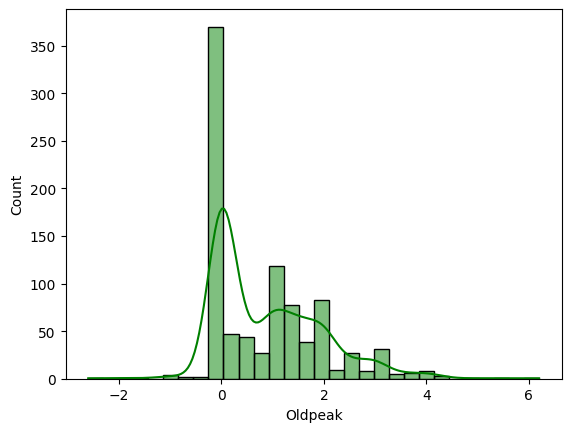

In [ ]:
sns.histplot(dados, x='Oldpeak', bins=30, color='green', kde=True, stat='count');

**ST_Slope = Inclinação do segmento ST no ECG**

In [ ]:
dados.ST_Slope.value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
px.pie(dados, 'ST_Slope')

**Heart Disease = Doença Cardíaca **

In [ ]:
dados.HeartDisease.value_counts()

,count
HeartDisease,
1,508
0,410


0 = Não possui doença cardíaca
1 = possui doença cardíaca

In [ ]:
px.pie(dados, 'HeartDisease')

**Análise dos tipos de atributos(variáveis).**

In [ ]:
# object : string
# int64 : inteiros
# float64 : reais
# complex : complexos
dados.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


**Valores Missing (NAN - Not a Number) **

In [ ]:
dados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# EXCLUIR VALORES MISSING (NULOS)
dados2 = dados.dropna()

In [ ]:
dados2.shape

(917, 12)

In [ ]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
dados2.Age.value_counts()

,count
Age,
54,51
58,42
55,40
56,38
57,38
52,36
62,35
59,35
51,35


In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2.Age.fillna(dados2.Age.mean(), inplace=True)

/tmp/ipython-input-1690553770.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# SUBSTITUIR OS VALORES MISSING POR QUALQER OUTRO VALOR
dados2.Age.fillna(10, inplace=True)

/tmp/ipython-input-3335711576.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Análises Estatísticas Descretivas **

In [ ]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


**Tratando Valores Incoerentes **

**Excluindo registro com pressão zero **

In [ ]:
dados2.RestingBP.value_counts()


,count
RestingBP,
120,132
130,118
140,107
110,58
150,55
...,...
101,1
117,1
192,1


Excluindo registros com pressão zero

In [ ]:
dados2 = dados.loc[dados.RestingBP != 0]

In [ ]:
dados2.shape

(917, 12)

In [ ]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados2.Cholesterol.value_counts()

,count
Cholesterol,
0,171
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
dados2.Cholesterol.mean()

np.float64(199.0163576881134)

In [ ]:
dados2.Cholesterol.replace(0, np.nan, inplace=True)

/tmp/ipython-input-1639027535.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1639027535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
dados2.Cholesterol.mean()

np.float64(244.6353887399464)

In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2.Cholesterol.fillna(dados2.Cholesterol.mean(), inplace=True)

/tmp/ipython-input-2632636541.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


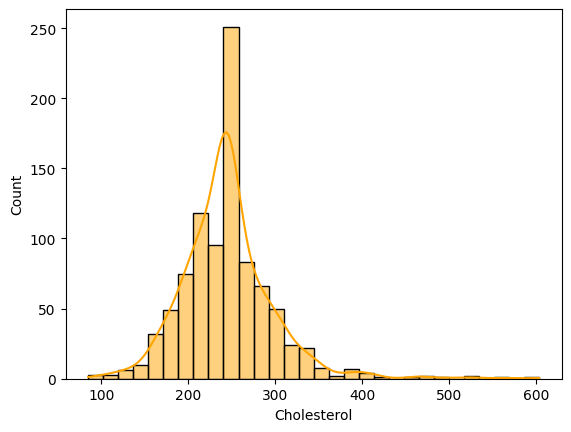

In [ ]:
sns.histplot(dados2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Análise de Outliers**

In [ ]:
# Idade

In [ ]:
px.box(dados2, y='Age')

In [ ]:
# Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

In [ ]:
# Colesterol
px.box(dados2, y='Cholesterol')

In [ ]:
# Frequência Cardíaca Máxima
px.box(dados2, y='MaxHR')

# **Salvando (Exportando) o Dataframe Tratado**

In [ ]:
dados2.to_csv('/content/drive/MyDrive/Machine Learning/heart_tratado.csv', sep=';', encoding='utf-8', index = False)